In [1]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt

In [11]:
train_data = pd.read_csv('input/train_set.csv', sep="\t")
train_data = train_data[0:]
train_data.head()

,RowNum,Id,Title,Content,Category
0,9560,9561,Sam Adams founder: Beer is more than just 'col...,"The craft beer boom, which and been attributed...",Business
1,10801,10802,Slump in oil prices could mean fall in investm...,The International Energy Agency has warned tha...,Business
2,6726,6727,British Gas owner Centrica warns of higher gas...,Senior executives at British have been accused...,Business
3,12365,12366,Ole Gunnar Solskjaer appointed manager of Card...,is confident he will have complete control of...,Football
4,11782,11783,Sunderland target loan signings of Kurt Zouma ...,Kurt Zouma and Jack Rodwell are on Sunderland’...,Football


In [10]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(train_data["Category"])
y

array([0, 0, 0, ..., 2, 0, 4])

In [13]:
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, use_idf = True)

In [14]:
X = vectorizer.fit_transform(train_data['Content'])

In [20]:
array = [2,3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
array2 = [2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [21]:
scoring = {  'Precision': make_scorer(precision_score, average = 'macro'),
             'Recall': make_scorer(recall_score,    average = 'macro'),
             'F-Measure': 'f1_macro',
             'Accuracy': 'accuracy' }

2
3
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0, 0.5, 'recall')

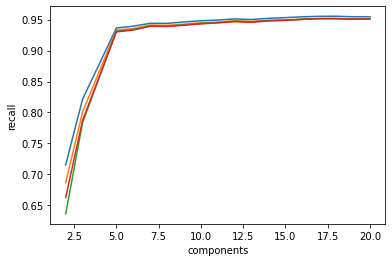

In [23]:
sum_score_acc = []
sum_score_f1 = []
sum_score_rec = []
sum_score_pre = []
clf = svm.SVC(kernel='linear', C=1, random_state=0)
svm_scores = []
for x in array2:
    print(x)
    lsa = TruncatedSVD(n_components = x)
    X_new = lsa.fit_transform(X)
    scores = cross_validate(clf, X_new, y, scoring = scoring, cv = 10)
    sum_score_acc.append(scores['test_Accuracy'].mean())
    sum_score_pre.append(scores['test_Precision'].mean())
    sum_score_f1.append(scores['test_F-Measure'].mean())
    sum_score_rec.append(scores['test_Recall'].mean())
plt.plot(array2,sum_score_acc)
plt.xlabel('components')
plt.ylabel('accuracy')
plt.plot(array2,sum_score_pre)
plt.xlabel('components')
plt.ylabel('precision')
plt.plot(array2,sum_score_f1)
plt.xlabel('components')
plt.ylabel('f1')
plt.plot(array2,sum_score_rec)
plt.xlabel('components')
plt.ylabel('recall')

In [ ]:
plt.plot(array2,sum_score_acc)
plt.xlabel('components')
plt.ylabel('accuracy')

In [ ]:
plt.plot(array2,sum_score_pre)
plt.xlabel('components')
plt.ylabel('precision')

In [ ]:
plt.plot(array2,sum_score_f1)
plt.xlabel('components')
plt.ylabel('f1')

In [ ]:
plt.plot(array2,sum_score_rec)
plt.xlabel('components')
plt.ylabel('recall')

In [ ]:
rf_score_acc = []
rf_score_f1 = []
rf_score_rec = []
rf_score_pre = []
clf = RandomForestClassifier()
rf_scores = []
for x in array2:
    print(x)
    lsa = TruncatedSVD(n_components = x)
    X_new = lsa.fit_transform(X)
    scores = cross_validate(clf, X_new, y, scoring = scoring, cv = 10)
    rf_score_acc.append(scores['test_Accuracy'].mean())
    rf_score_pre.append(scores['test_Precision'].mean())
    rf_score_f1.append(scores['test_F-Measure'].mean())
    rf_score_rec.append(scores['test_Recall'].mean())

In [ ]:
plt.plot(array2,rf_score_acc)
plt.xlabel('components')
plt.ylabel('accuracy')

plt.plot(array2,rf_score_pre)
plt.xlabel('components')
plt.ylabel('precision')

plt.plot(array2,rf_score_f1)
plt.xlabel('components')
plt.ylabel('f1')

plt.plot(array2,rf_score_rec)
plt.xlabel('components')
plt.ylabel('recall')

In [ ]:
nb_score_acc = []
nb_score_f1 = []
nb_score_rec = []
nb_score_pre = []
array = [2,3,5,10,15,20,25,30,40,50,60] 
clf = MultinomialNB()
mnb_scores = []
for x in array:
    print(x)
    lsa = NMF(n_components = x)
    X_new = lsa.fit_transform(X)
    scores = cross_validate(clf, X_new, y, scoring = scoring, cv = 10)
    nb_score_acc.append(scores['test_Accuracy'].mean())
    nb_score_pre.append(scores['test_Precision'].mean())
    nb_score_f1.append(scores['test_F-Measure'].mean())
    nb_score_rec.append(scores['test_Recall'].mean())

In [ ]:
plt.plot(array,nb_score_acc)
plt.xlabel('components')
plt.ylabel('accuracy')

plt.plot(array,nb_score_pre)
plt.xlabel('components')
plt.ylabel('precision')

plt.plot(array,nb_score_f1)
plt.xlabel('components')
plt.ylabel('f1')

plt.plot(array,nb_score_rec)
plt.xlabel('components')
plt.ylabel('recall')